In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# **Exploratory Data Analysis (EDA)**

In [307]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Credit%20Default.csv")
df

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [309]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [310]:
pd.set_option('display.max_columns', None)
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [311]:
df.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [312]:
df.Default

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: Default, Length: 2000, dtype: int64

In [313]:
df.isnull().any()

Income            False
Age               False
Loan              False
Loan to Income    False
Default           False
dtype: bool

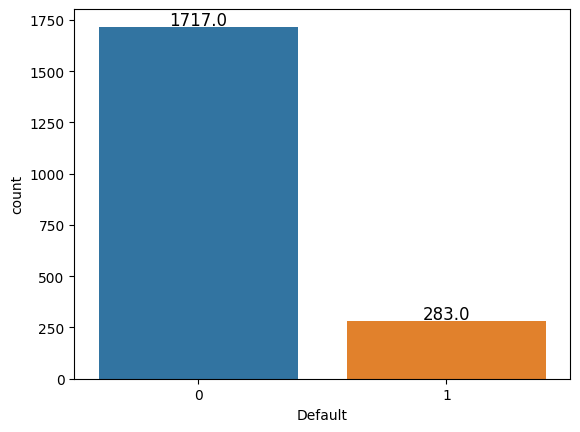

In [314]:
#count plot
count_plot = sns.countplot(x = "Default", data = df, hue = "Default", legend = False)

#creating loop to add count on each bar
for i in count_plot.patches:
  count_plot.annotate(f'{i.get_height()}',
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha="center", va="center", fontsize="12", color="black", xytext=(0, 5),
                     textcoords="offset points"
                     )

<Axes: >

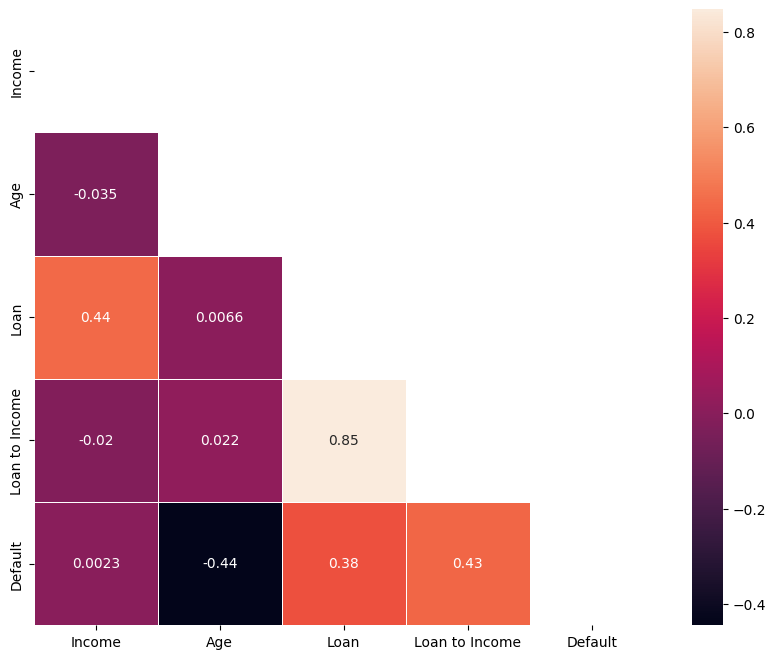

In [315]:
#visualizing by heatmap
plt.figure(figsize=(10,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask = matrix, linewidth = .5, cmap = "rocket")

In [316]:
#Declaring x & y variables
x = df.drop(["Default"], axis = 1)
y = df.Default
column = x.columns.to_list()

# **Finding & Dealing with Outliers**

In [317]:
x.iloc[:, 1]

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: Age, Length: 2000, dtype: float64

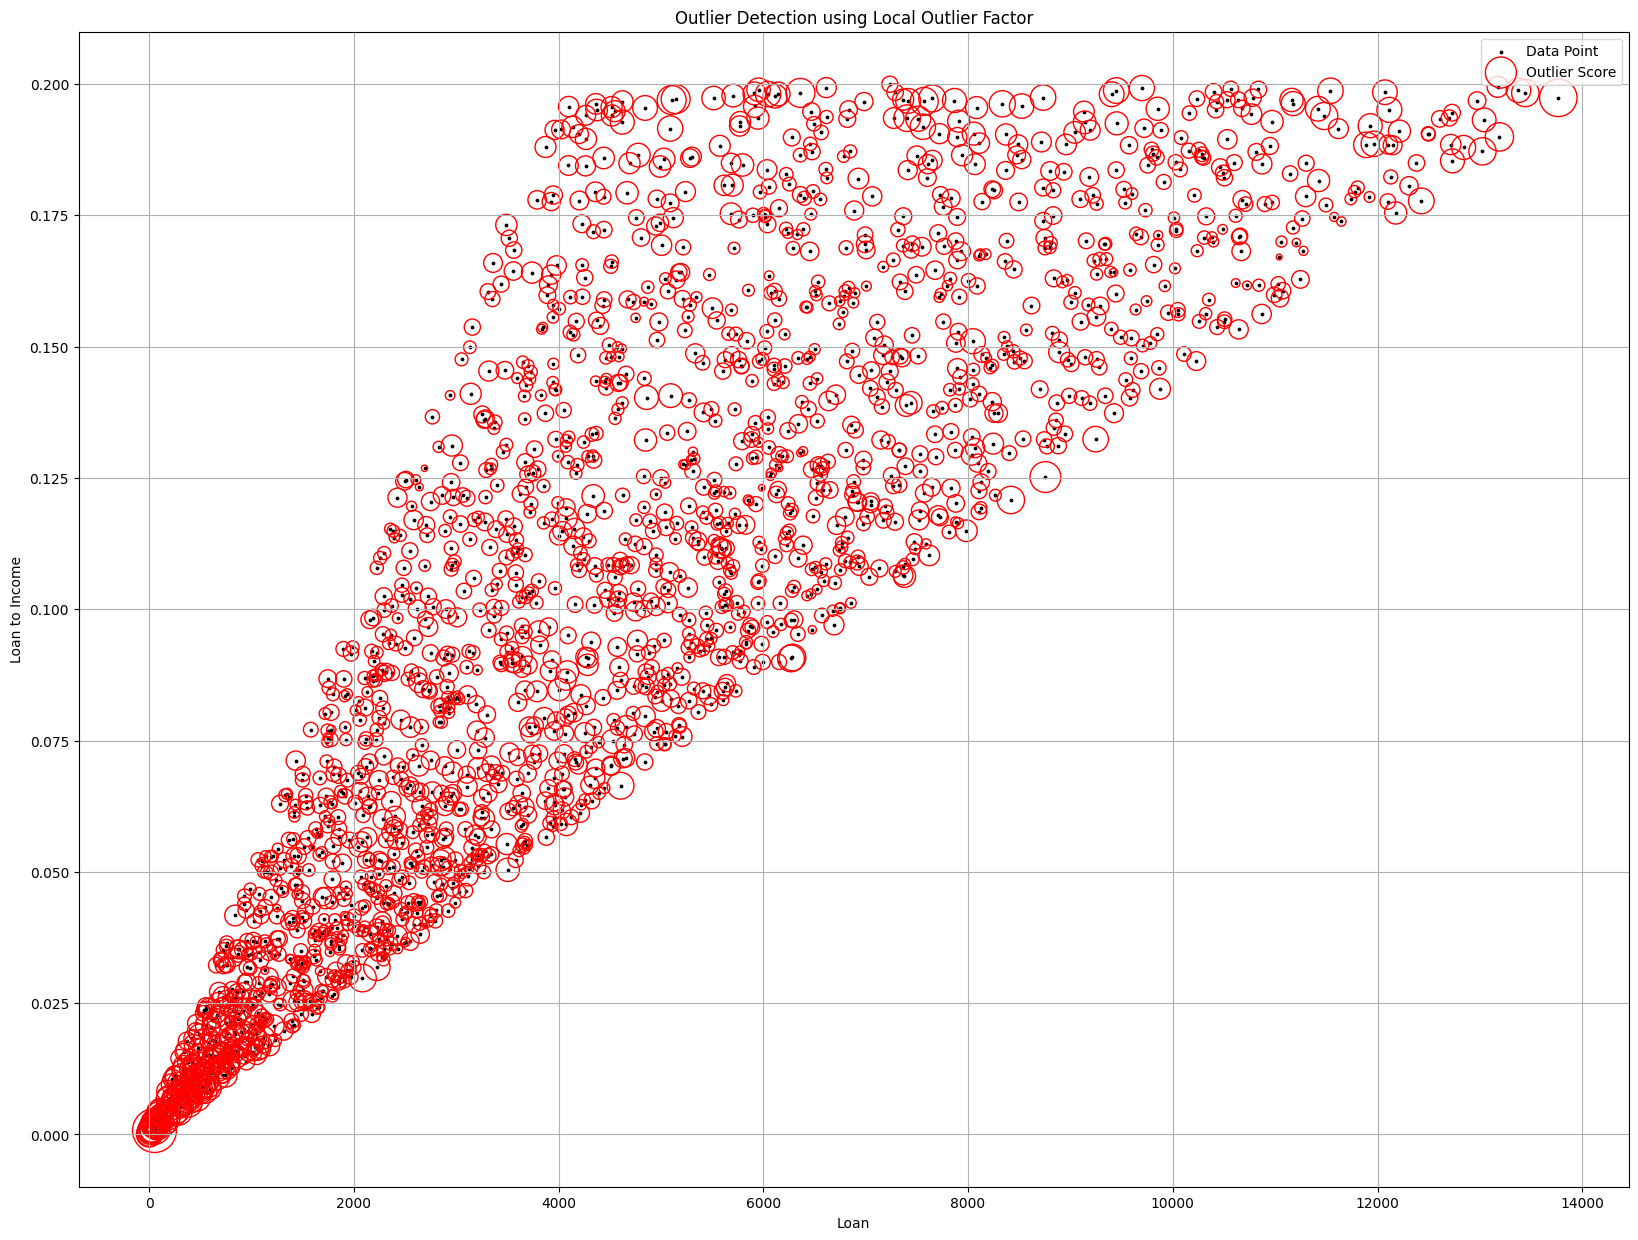

Outlier indices: []


In [318]:
#fitting LocalOutlierFactor model to the data
lof = LocalOutlierFactor()
lof.fit(x)

X_score = lof.negative_outlier_factor_ #negative outlier factor scores

#Scatter plot
plt.figure(figsize=(20, 15))
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], color="k", s=3, label="Data Point")

radius = (X_score.max() - X_score) / (X_score.max() - X_score.min()) #radius for each point based on the outlier score
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], s = 1000 * radius, edgecolors = "r", facecolors = "none", label = "Outlier Score")

#labeling
plt.xlabel(column[2])
plt.ylabel(column[3])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor')
plt.show()

#Thresholding
threshold_outlier = -2.5
filtre = X_score < threshold_outlier
outlier_index = np.where(filtre)[0]
print("Outlier indices:", outlier_index)

# **Principal Component Analysis**

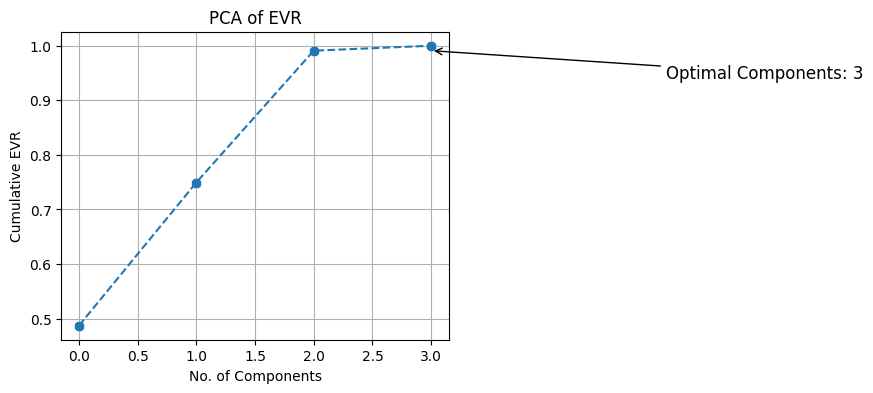

In [319]:
#Since no ouliers are found so, start with Stardardization
x_standardized = (x - x.mean()) / x.std()

#PCA without specifying the number of components
pca = PCA()
pca.fit(x_standardized)

explained_variance_ratio = pca.explained_variance_ratio_ #Calculating explained variance ratio

#Finding the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

#Plotting for explained variance ratio(evr)
plt.figure(figsize = (5, 4))
plt.plot(np.cumsum(explained_variance_ratio), marker="8", linestyle="--" )
plt.xlabel('No. of Components')
plt.ylabel('Cumulative EVR')
plt.title('PCA of EVR')

plt.annotate(f'Optimal Components: {optimal_components}',
             xy = (optimal_components, cumulative_variance_ratio[optimal_components - 1]),
             xytext = (optimal_components + 2, cumulative_variance_ratio[optimal_components - 1] - 0.05),
             arrowprops=dict(facecolor = "black", arrowstyle = "->" ),
             fontsize = 12
             )
plt.grid(True)
plt.show()

In [320]:
#From above plot, best number of component is 3
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(x_standardized)

#Creating a Principal DataFrame which hold the principal_components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 4)])
principal_df

,PC1,PC2,PC3
0,1.588391,-0.001258,-1.750194
1,1.264368,1.425033,0.481080
2,1.564981,0.725651,-1.553093
3,0.817157,0.622652,0.048338
4,1.830001,-1.923831,0.618151
...,...,...,...
1995,-0.993874,-0.697461,-1.321445
1996,-0.217980,-2.301133,-0.156247
1997,0.507732,-0.411966,0.926123
1998,-1.348656,0.813234,-1.593701


In [321]:
# Concatenating principal components with the Default or target variable (y)
principal_df2 = pd.concat([principal_df, pd.DataFrame(y, columns = ["Default"])], axis = 1)
principal_df2

,PC1,PC2,PC3,Default
0,1.588391,-0.001258,-1.750194,0
1,1.264368,1.425033,0.481080,0
2,1.564981,0.725651,-1.553093,0
3,0.817157,0.622652,0.048338,0
4,1.830001,-1.923831,0.618151,1
...,...,...,...,...
1995,-0.993874,-0.697461,-1.321445,0
1996,-0.217980,-2.301133,-0.156247,0
1997,0.507732,-0.411966,0.926123,1
1998,-1.348656,0.813234,-1.593701,0


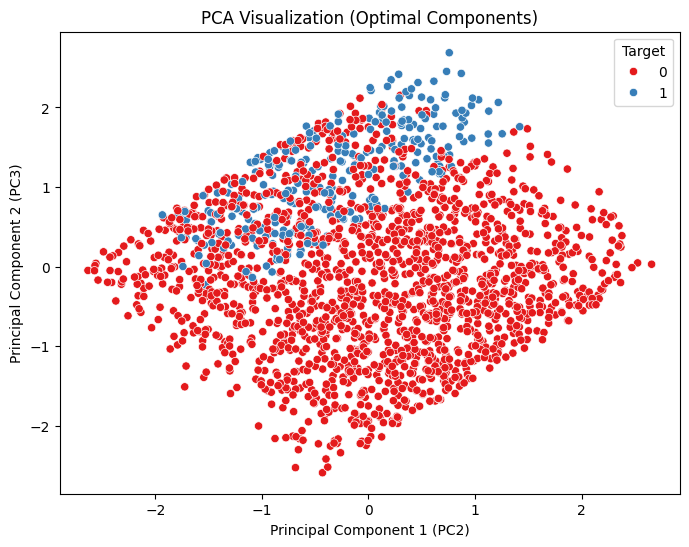

In [322]:
#creating scatterplot for final result for PC1 & PC2
plt.figure(figsize = (8, 6))
sns.scatterplot(x = "PC2", y = "PC3", hue = "Default", data = principal_df2, palette = "Set1")
plt.title('PCA Visualization (Optimal Components)')
plt.xlabel('Principal Component 1 (PC2)')
plt.ylabel('Principal Component 2 (PC3)')
plt.legend(title='Target', loc='upper right')
plt.show()

# **Creating Model**

In [338]:
# From PCA split dataset into training & testing dataset
x_train, x_test, y_train, y_test = train_test_split(principal_components, y, test_size = 0.2, random_state = 2529)

#creating model
model = LogisticRegression()
model.fit(x_train, y_train)

#predicting
y_pred = model.predict(x_test)


#confusion matrix
print("=" * 20)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("=" * 20)

#evaluating
accuracy = accuracy_score(y_test, y_pred)
print("\n")
print("_" * 40)
print("Accuracy:", accuracy, "\nAccuracy in percentage:", accuracy * 100, "%")
print("_" * 40)
print("\n")


#classification report
print("-" * 60)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("-" * 60)

Confusion Matrix:
 [[342   5]
 [  8  45]]


________________________________________
Accuracy: 0.9675 
Accuracy in percentage: 96.75 %
________________________________________


------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       347
           1       0.90      0.85      0.87        53

    accuracy                           0.97       400
   macro avg       0.94      0.92      0.93       400
weighted avg       0.97      0.97      0.97       400

------------------------------------------------------------
